In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open("data.pickle", "rb") as input_file:
    data = pickle.load(input_file)

In [3]:
def plot_counts(counts_arr, title="", save_fig=False):
    word_arr_encoded = []
    word_arr_numbers = []
    for k, v in counts_arr:
        word_arr_encoded.append(k.encode('utf-8').decode('utf-8'))
        word_arr_numbers.append(v)
    plt.figure(figsize=(16, 6))
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Word Frequency per Word'+prefix+title)
    sns.barplot(word_arr_encoded,word_arr_numbers)
    if save_fig:
        plt.savefig("plots/"+title+"_hist.png")

In [4]:
def loglog(counts, title="", save_fig=False):
    f, ax = plt.subplots(figsize=(7, 7))
    rank = np.array([i for i in range(1,len(counts)+1)])
    word_arr_numbers = []
    for k, v in counts:
        word_arr_numbers.append(int(v))
    word_arr_numbers = np.array(word_arr_numbers)
    ax.set(xscale="log", yscale="log")
    plt.xlabel('log Rank')
    plt.ylabel('log Frequency')
    plt.title('log log Relation between Rank and Frequency'+prefix + title)
    sns.scatterplot(rank, word_arr_numbers)
    if save_fig:
        plt.savefig("plots/"+title+"_log.png")

In [5]:
prefix = " - "
languages = ['da','de','el','en','eo','es','fi','fr','hu','it','la','nl','pt','sv','tl','zh']
languages_pretty = ['Danish','German','Greek','English','Esperanto','Spanish','Finnish','French','Hungarian','Italian','Latin','Dutch','Portugese','Swedish','Tagalog','Chinese']

da
Danish
de
German
el
Greek
en
English
eo
Esperanto
es
Spanish
fi
Finnish
fr
French
hu
Hungarian
it
Italian
la
Latin


/Users/jacobchan/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


nl
Dutch
pt
Portugese
sv
Swedish
tl
Tagalog
zh
Chinese


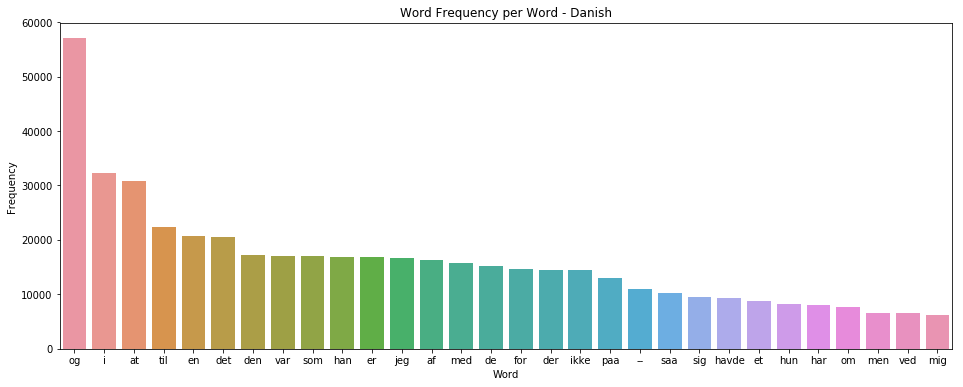

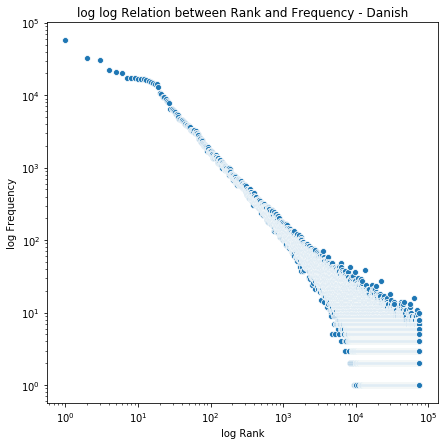

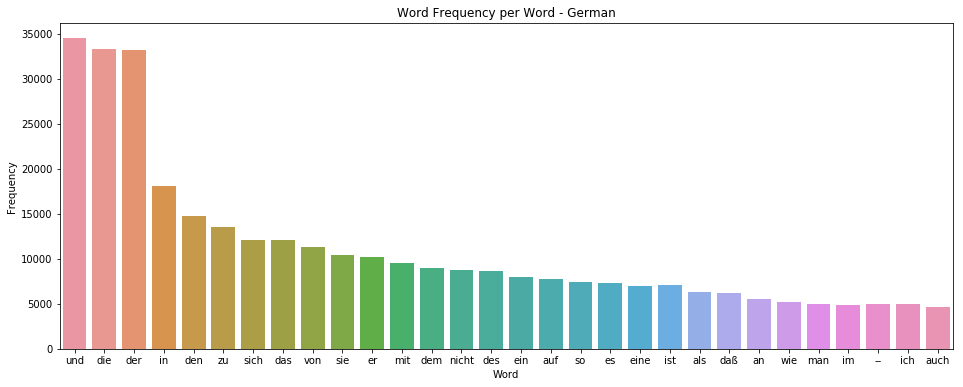

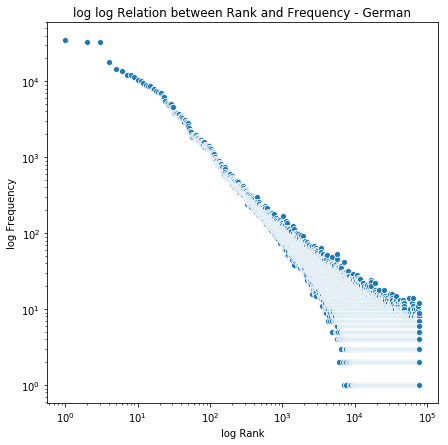

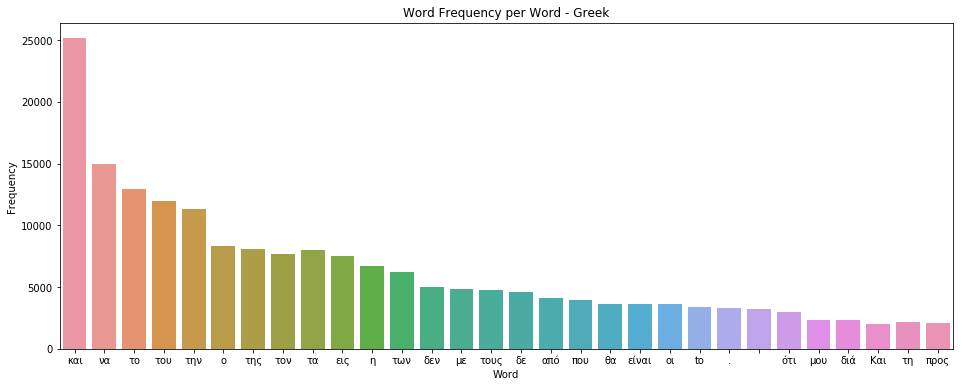

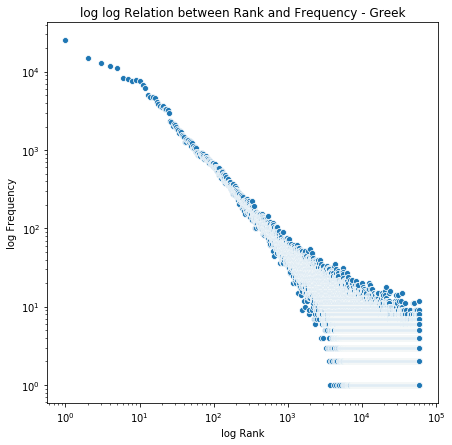

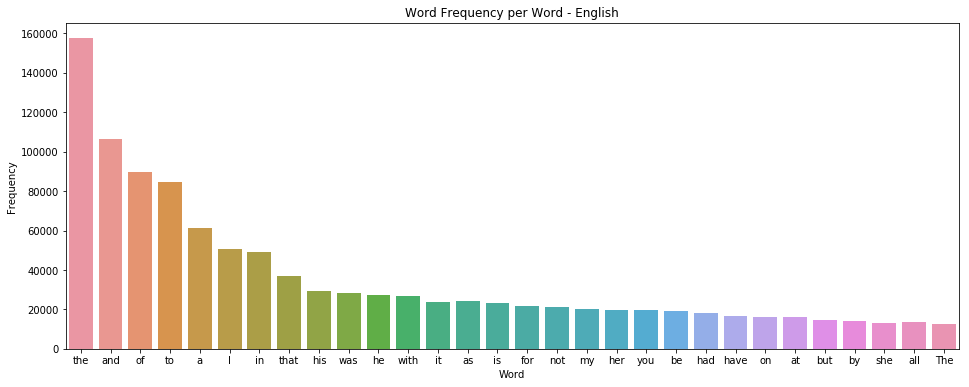

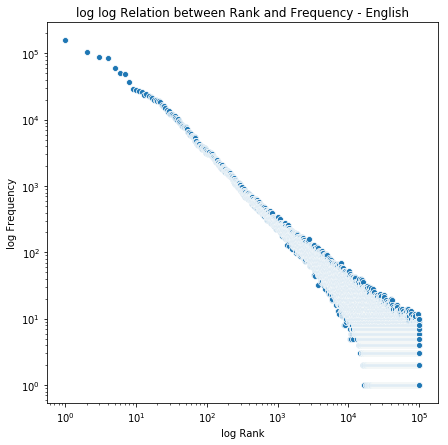

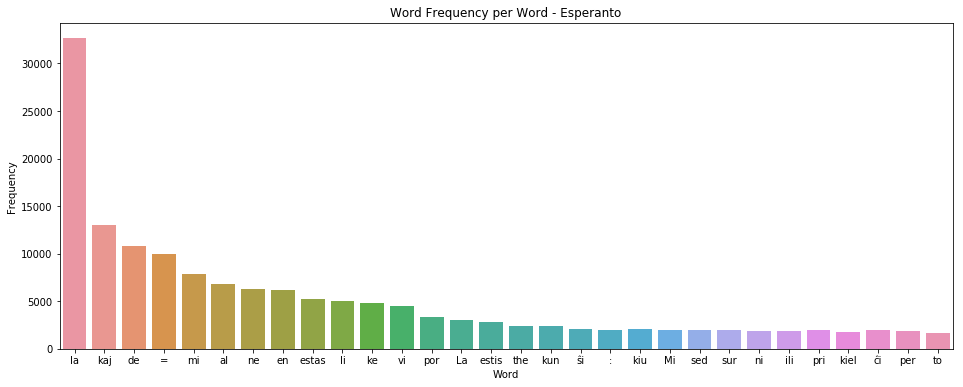

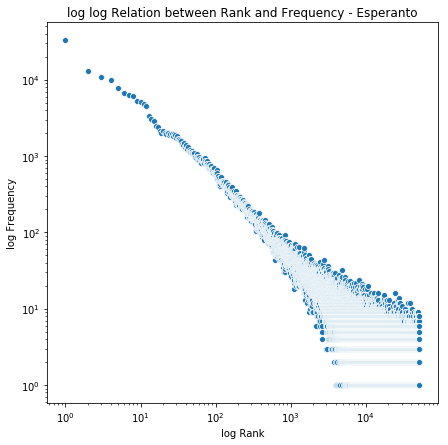

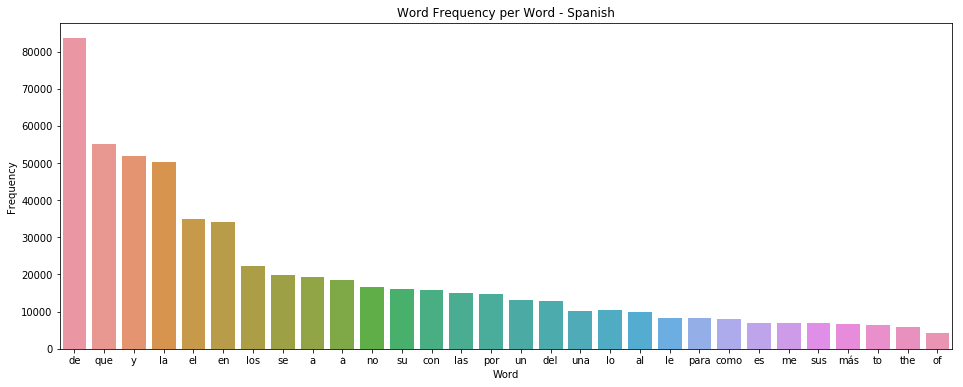

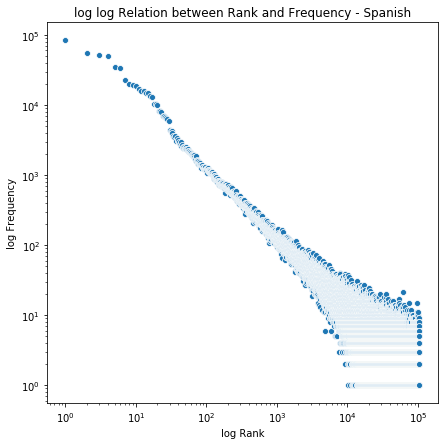

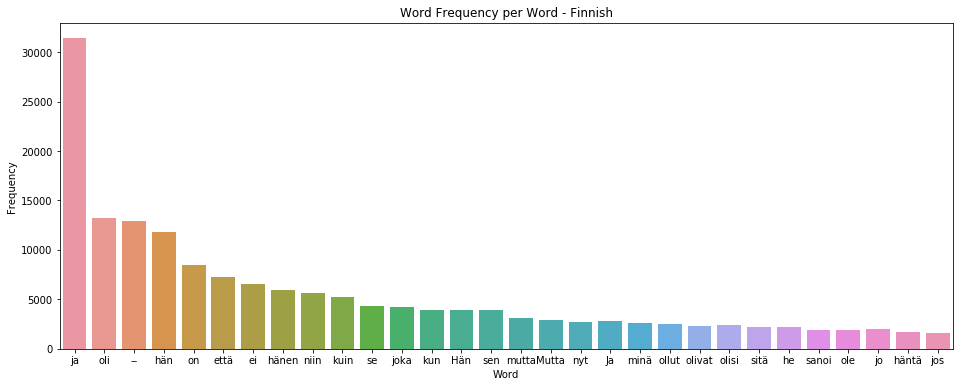

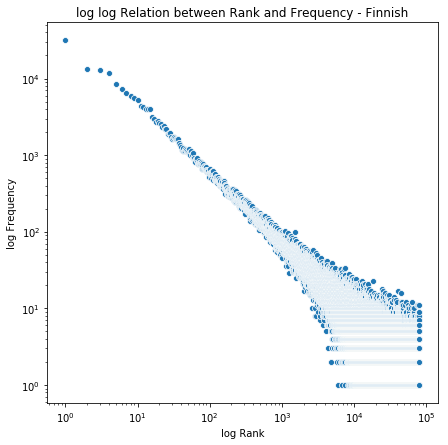

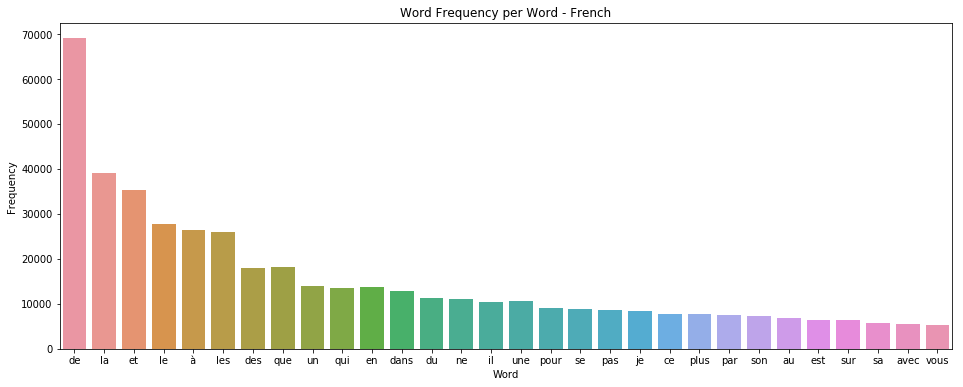

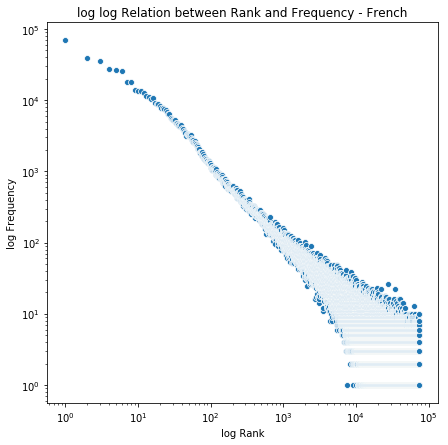

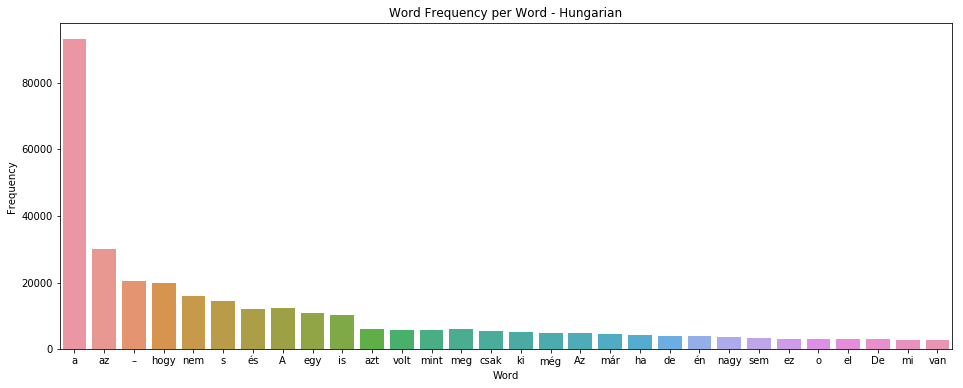

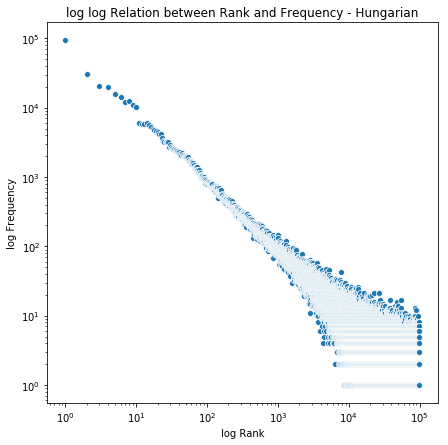

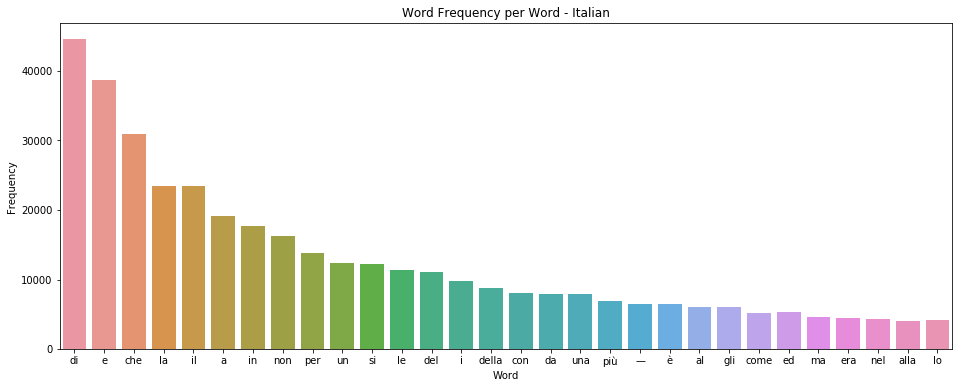

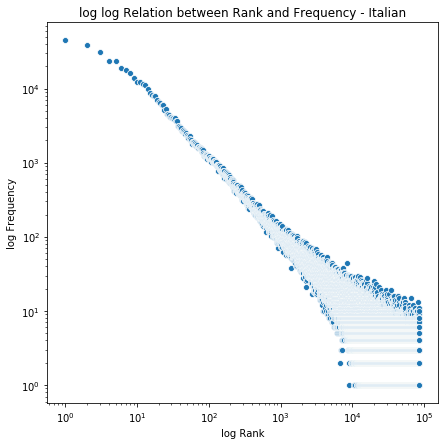

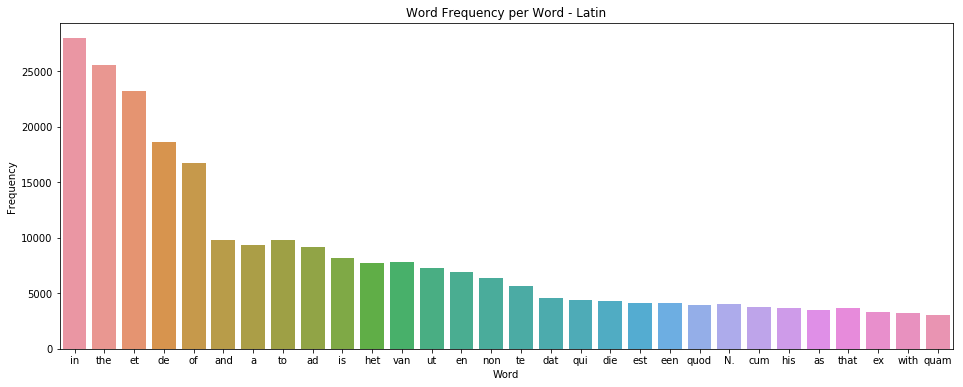

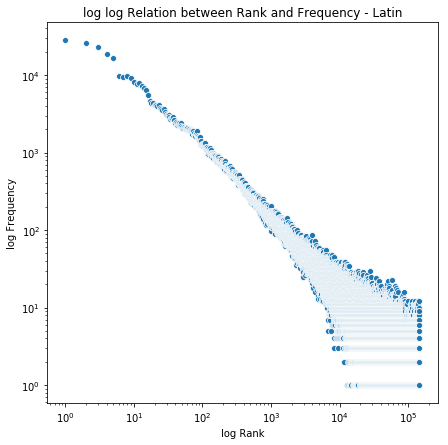

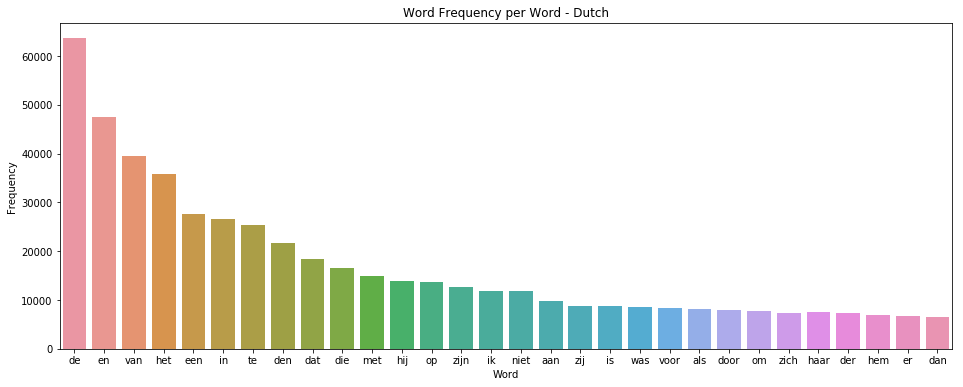

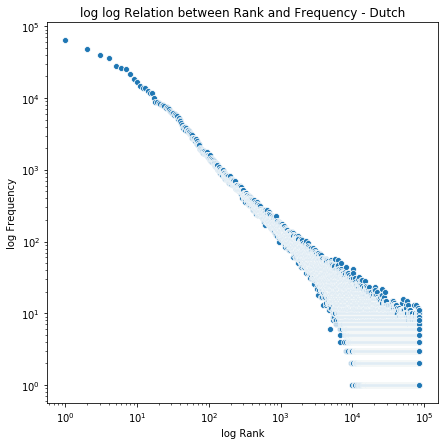

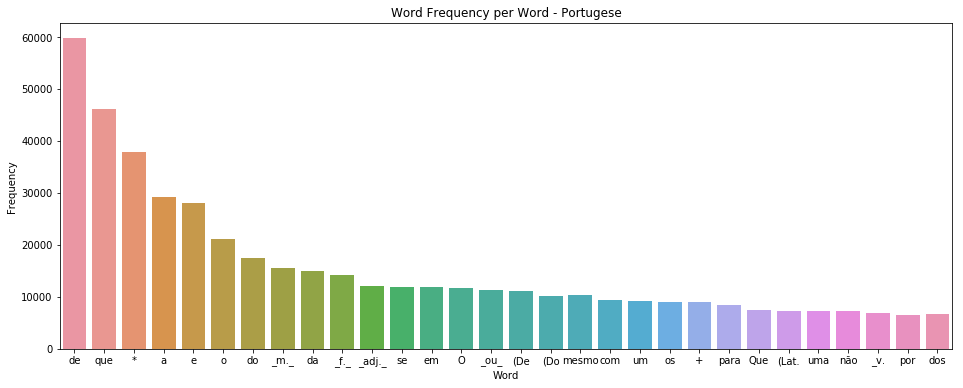

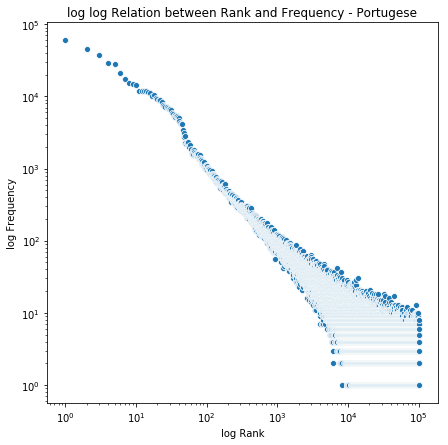

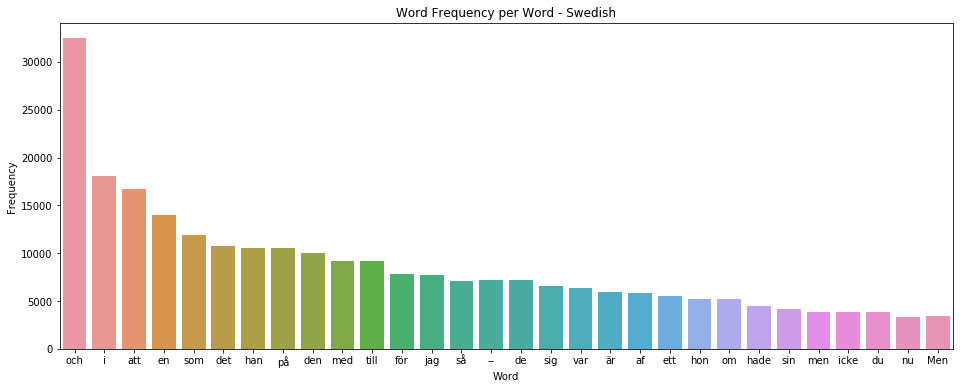

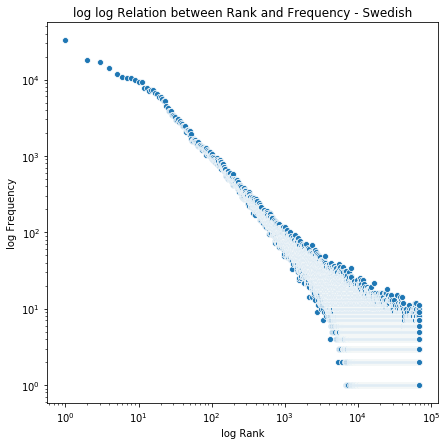

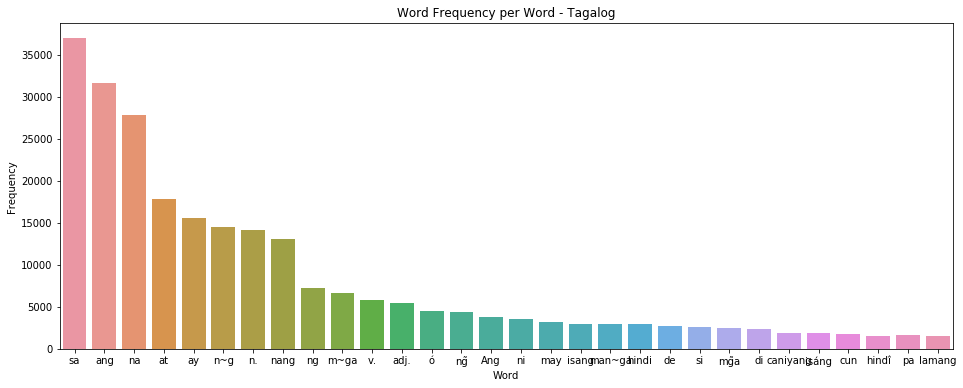

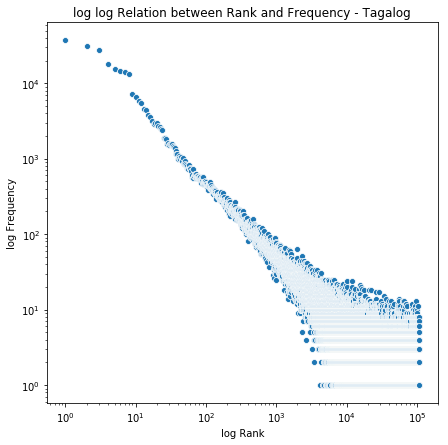

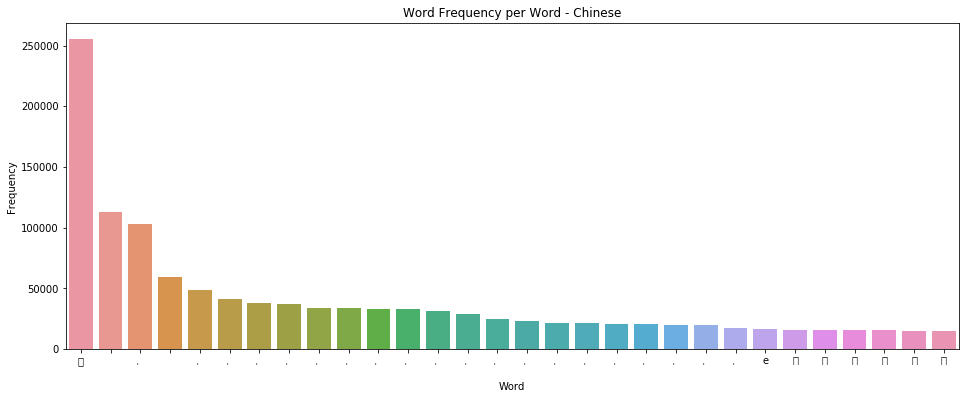

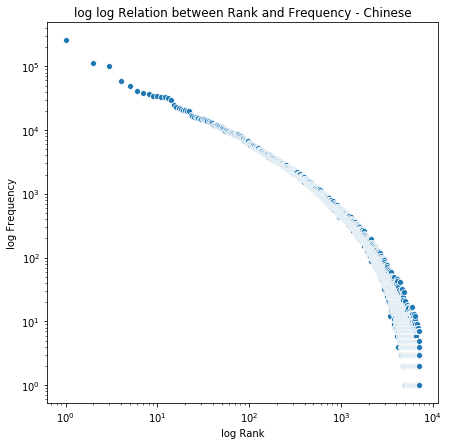

In [8]:
for i in range(0,len(languages)):
    print languages[i]
    print languages_pretty[i]
    plot_counts(data[languages[i]][0:30], languages_pretty[i],True)
    loglog(data[languages[i]], languages_pretty[i],True)